# Quantitative image analysis
After segmenting and labeling objects in an image, we can measure properties of these objects.

See also
* [SciPy lecture notes: Measuring region properties](https://scipy-lectures.org/packages/scikit-image/index.html#measuring-regions-properties)
* [Plot regionprops](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html)

Before we can do measurements, we need an `image` and a corresponding `label_image`. Therefore, we recapitulate filtering, thresholding and labeling:

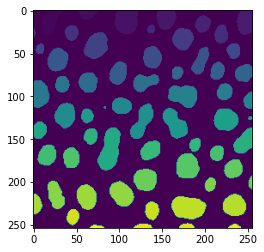

In [1]:
# load image
from skimage.io import imread
image = imread("blobs.tif")

# denoising
from skimage import filters
blurred_image = filters.gaussian(image, sigma=1)

# binarization
threshold = filters.threshold_otsu(blurred_image)
thresholded_image = blurred_image >= threshold

# labeling
from skimage import measure
label_image = measure.label(thresholded_image)

# visualization
from matplotlib.pyplot import imshow
imshow(label_image)

# Measurements / region properties
To read out properties from regions, we use the [regionprops](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops) function:

In [2]:
from skimage import measure

# analyse objects
properties = measure.regionprops(label_image, intensity_image=image)

The results are stored as `RegionProps` objects, which are not very informative:

In [3]:
properties[0:5]

We can reorganize the measurements into a dictionary containing arrays. We introduced them earlier as [tables](https://nbviewer.jupyter.org/github/BiAPoL/Bio-image_Analysis_with_Python/blob/main/python_basics/06_Dictionaries_and_tables.ipynb):

In [4]:
statistics = {
    'area':       [p.area               for p in properties],
    'mean':       [p.mean_intensity     for p in properties],
    'major_axis': [p.major_axis_length  for p in properties]
}

statistics

{'area': [429,
  183,
  658,
  433,
  472,
  280,
  75,
  271,
  227,
  27,
  494,
  649,
  96,
  225,
  448,
  397,
  513,
  423,
  268,
  349,
  158,
  406,
  422,
  254,
  503,
  282,
  675,
  176,
  358,
  542,
  599,
  7,
  635,
  192,
  594,
  19,
  264,
  896,
  473,
  239,
  166,
  408,
  413,
  239,
  374,
  647,
  378,
  577,
  66,
  169,
  467,
  612,
  539,
  203,
  556,
  850,
  278,
  213,
  79,
  88,
  52,
  48],
 'mean': [191.44055944055944,
  179.84699453551912,
  205.6048632218845,
  217.5150115473441,
  213.03389830508473,
  205.65714285714284,
  164.16,
  176.0590405904059,
  189.53303964757708,
  149.33333333333334,
  190.0080971659919,
  172.42526964560864,
  166.41666666666666,
  196.8,
  209.03571428571428,
  180.0705289672544,
  194.86939571150097,
  196.27423167848698,
  200.77611940298507,
  190.64756446991404,
  183.69620253164558,
  187.21182266009853,
  202.54028436018956,
  180.5984251968504,
  198.6958250497018,
  189.33333333333334,
  199.07555555555555

You can also add custom columns by computing your own metric, for example the `aspect_ratio`:

In [5]:
statistics['aspect_ratio'] = [p.major_axis_length / p.minor_axis_length for p in properties]

Reading those dictionaries of arrays is not very convenient. Thus, we use the [pandas library]() which is a common asset for data scientists.

In [6]:
import pandas as pd

dataframe = pd.DataFrame(statistics)
dataframe

,area,mean,major_axis,aspect_ratio
0,429,191.440559,34.779230,2.088249
1,183,179.846995,20.950530,1.782168
2,658,205.604863,30.198484,1.067734
3,433,217.515012,24.508791,1.061942
4,472,213.033898,31.084766,1.579415
...,...,...,...,...
57,213,184.525822,18.753879,1.296143
58,79,184.810127,18.287489,3.173540
59,88,182.727273,21.673692,4.021193
60,52,189.538462,14.335104,2.839825


Those dataframes can be saved to disk conveniently:

In [7]:
dataframe.to_csv("blobs_analysis.csv")

Furthermore, one can measure properties from our `statistics` table using [numpy](https://numpy.org/doc/stable/). For example the mean area:

In [8]:
import numpy as np

# measure mean area
np.mean(statistics['area'])

355.3709677419355

# Exercises
Analyse the loaded blobs `image`. 

* How many objects are in it?

* How large is the largest object?

* What are mean and standard deviation of the image?

* What are mean and standard deviation of the area of the segmented objects?